# Modelling and Evaluating Notebook

## Objectives

* Answer business requirement 2:
    * The client is interested to tell whether a given leaf contains a powdery mildew or not.

## Inputs

* inputs/cherry_mildew_dataset/cherry-leaves/train
* inputs/cherry_mildew_dataset/cherry-leaves/test
* inputs/cherry_mildew_dataset/cherry-leaves/validation
* image shape embeddings.

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Additional Comments

* No comment



---

## Import regular packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Change working directory

***

## Set working directory

In [2]:
current_dir = os.getcwd()

In [3]:
os.chdir('/workspaces/milestone-project-cherry-leaves-mildew-detection')
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-cherry-leaves-mildew-detection'

***

## Set input directories

Set train, validation and test paths

In [5]:
# This code snippet was adapted/updated from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

my_data_dir = os.path.abspath('inputs/cherry_mildew_dataset/cherry-leaves')
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

## Set output directory

In [6]:
# This code snippet was adapted/updated from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [7]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

label_list = os.listdir(train_path)

print(
    f"Project Labels: {label_list}"
)

Project Labels: ['powdery_mildew', 'healthy']


## Set image shape

In [8]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

# Number of images in train, test and 
# validation data

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images


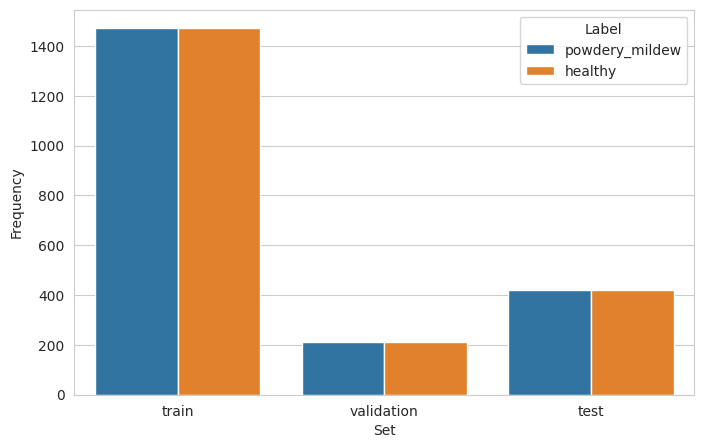

In [9]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

# Initialize an empty DataFrame to store the data
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])


folders = ['train', 'validation', 'test']

# Iterate through folders and labels to count images
for folder in folders:
    for label in label_list:
        folder_path = os.path.join(my_data_dir, folder, label)
        num_images = len(os.listdir(folder_path))
        df_freq = df_freq.append({'Set': folder, 'Label': label, 'Frequency': num_images}, ignore_index=True)
        print(f"* {folder} - {label}: {num_images} images")

# Plot the distribution of labels
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()


***

## Image data augmentation

***

### ImageDataGenerator

In [10]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

from tensorflow.keras.preprocessing.image import ImageDataGenerator

 + ### Initialize ImageDataGenerator

In [11]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

* ## Augment training image dataset

In [12]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ## Augment validation image dataset

In [13]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ## Augment test image dataset

In [14]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 256, 256, 3)


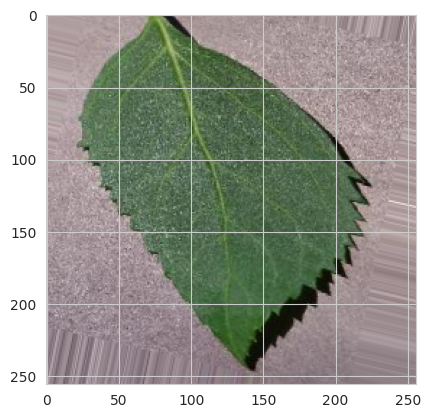

(20, 256, 256, 3)


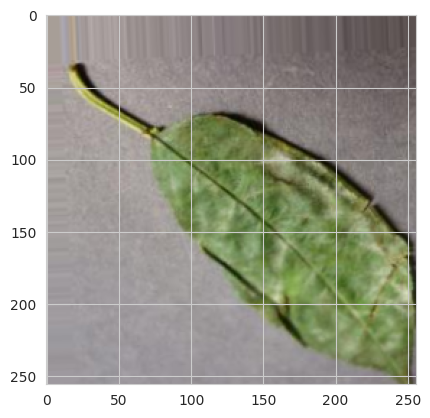

(20, 256, 256, 3)


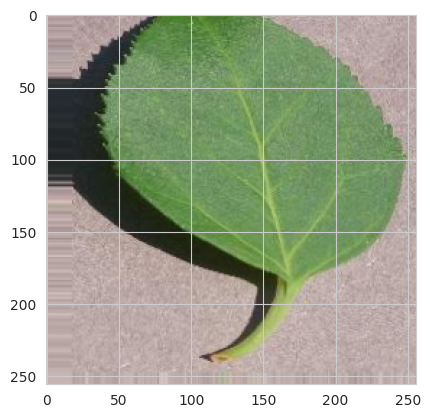

In [15]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation and test images

(20, 256, 256, 3)


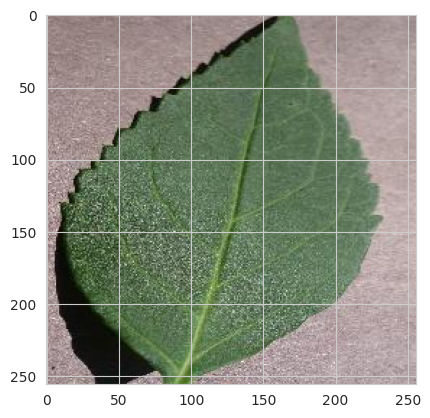

(20, 256, 256, 3)


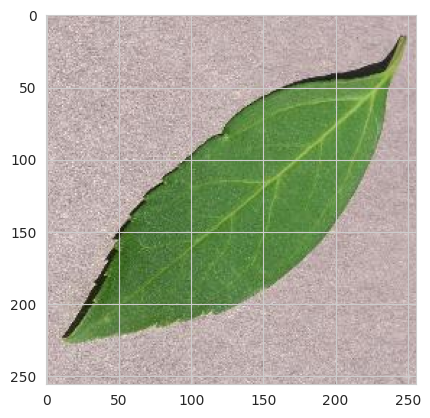

(20, 256, 256, 3)


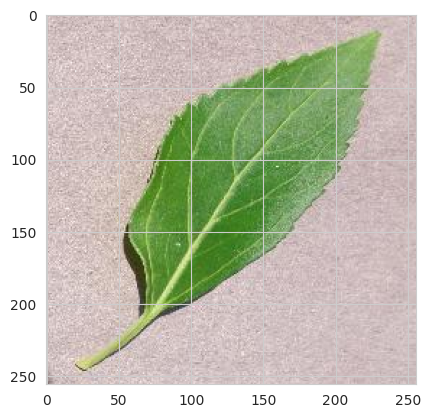

In [16]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

(20, 256, 256, 3)


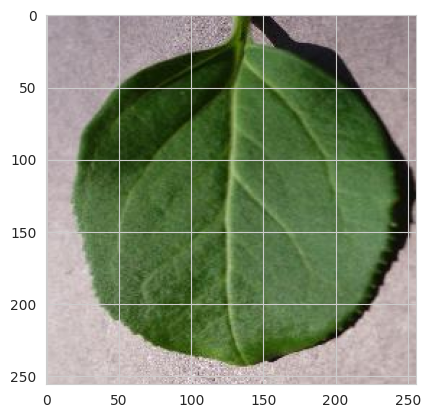

(20, 256, 256, 3)


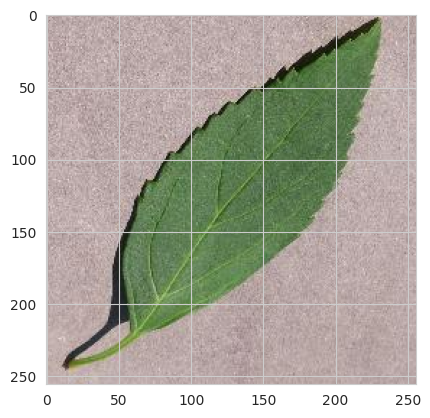

(20, 256, 256, 3)


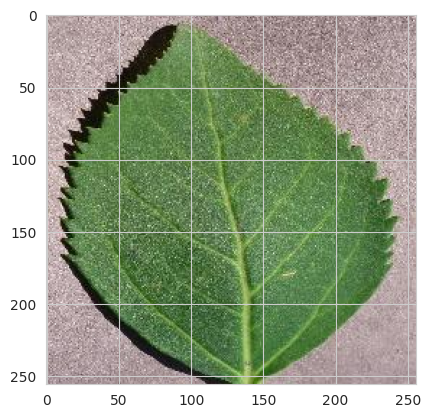

In [17]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

for _ in range(3):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [18]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

***

# **Model creation**

***

## ML model

* ## Import model packages

In [19]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

* ## Model

In [24]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

def create_tf_model(input_shape, n_labels):
    model = Sequential([
        Conv2D(16, (3, 3), input_shape=input_shape, activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),  
        Dense(1, activation='sigmoid')  
    ])

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [25]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

n_labels = len(label_list)  
model = create_tf_model(input_shape=image_shape, n_labels=n_labels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                7872576   
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

* ### Early Stopping

In [26]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb


from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7)

# Fit the model for training purposes

In [27]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
147/147 [==============================] - 238s 1s/step - loss: 0.6141 - accuracy: 0.7551 - val_loss: 0.1125 - val_accuracy: 0.9714
Epoch 2/25
147/147 [==============================] - 181s 1s/step - loss: 0.2175 - accuracy: 0.9220 - val_loss: 0.0549 - val_accuracy: 0.9905
Epoch 3/25
147/147 [==============================] - 171s 1s/step - loss: 0.1442 - accuracy: 0.9566 - val_loss: 0.0728 - val_accuracy: 0.9905
Epoch 4/25
147/147 [==============================] - 177s 1s/step - loss: 0.1290 - accuracy: 0.9617 - val_loss: 0.0398 - val_accuracy: 0.9905
Epoch 5/25
147/147 [==============================] - 172s 1s/step - loss: 0.1075 - accuracy: 0.9771 - val_loss: 0.0183 - val_accuracy: 0.9952
Epoch 6/25
147/147 [==============================] - 182s 1s/step - loss: 0.0891 - accuracy: 0.9706 - val_loss: 0.0050 - val_accuracy: 0.9976
Epoch 7/25
147/147 [==============================] - 197s 1s/step - loss: 0.0677 - accuracy: 0.9819 - val_loss: 0.0085 - val_accuracy: 1.0000

* ## Save Model

In [28]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/b90e9193974b30d5a20dcf3a013c8e819cefebfd/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

model.save('outputs/v1/cherry_mildew_detector_model.h5')

***

# **Model Performance**

***

## Model Learning Curve